# Project 2(AI+ML) 

## #1. Import Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



### Loading of datasets

In [135]:
dr= pd.read_csv(r'C:\Users\Fast Computers\Downloads\googleplaystore_user_reviews.csv\googleplaystore_user_reviews.csv')

In [136]:
dg=pd.read_csv(r'C:\Users\Fast Computers\Downloads\googleplaystore.csv')

## EDA

In [137]:
dg.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [138]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 All the Columns are of type Object. This needs alot of type conversions.

In [139]:
dg.shape

(10841, 13)

In [140]:
dg.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [141]:
dg.duplicated().sum()

483

In [142]:
# Handling duplicates
dg.drop_duplicates()
dg.shape

(10841, 13)

In [143]:
dg.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [144]:
# Handle missing values
dg = dg.dropna()

# Convert 'Reviews' column to numeric
dg['Reviews'] = pd.to_numeric(dg['Reviews'], errors='coerce')

In [145]:
# Function to convert size values to numeric
def convert_size_to_numeric(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024  # Convert MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return None  # Handle 'Varies with device' or other cases

# Apply the function to the 'Size' column
# Convert to numeric, errors='coerce' will replace non-convertible values with NaN
dG['Size'] = pd.to_numeric(dG['Size'], errors='coerce')

In [78]:


# Remove non-numeric characters (except '.')
dG['Size'] = dG['Size'].replace('[^\d.]', '', regex=True)



# Replace NaN with 0
dG['Size'] = dG['Size'].fillna(0)

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\1471402109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dG['Size'] = dG['Size'].replace('[^\d.]', '', regex=True)
C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\1471402109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dG['Size'] = dG['Size'].fillna(0)


In [146]:
dG['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [147]:
dG['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [148]:
additinal_item = ['+' , ',' , '$']
target_cols = ['Installs' , 'Price']
for item in additinal_item:
    for col in target_cols:
        dG[col] = dG[col].str.replace(item,'')
dG.head()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\3516947516.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dG[col] = dG[col].str.replace(item,'')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0,1,9,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,0,3.9,967,14.0,500000,0,0,1,11,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0,1,9,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0,4,9,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0,1,10,1.1,4.4 and up,6,2018


In [62]:
dg['Updated_Month']=dg['Last Updated'].dt.month
dg['Updated_Year']=dg['Last Updated'].dt.year

In [149]:
dg.drop('Last Updated', axis=1, inplace=True)
dg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


### Basic Statistics

In [150]:
dG.describe()

,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Updated_Month,Updated_Year
count,9268.000000,9268.000000,9.268000e+03,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000
mean,16.813660,4.189847,2.814968e+05,18.821470,0.069594,1.485650,62.352287,6.445188,2017.414437
std,8.279091,0.517111,1.001831e+06,22.792449,0.254476,1.021147,32.275285,2.519529,1.105972
min,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000
25%,11.000000,4.000000,1.807500e+02,2.400000,0.000000,1.000000,37.000000,5.000000,2017.000000
50%,14.000000,4.300000,5.510500e+03,9.400000,0.000000,1.000000,65.000000,7.000000,2018.000000
75%,25.000000,4.500000,7.556725e+04,27.000000,0.000000,1.000000,93.000000,8.000000,2018.000000
max,32.000000,5.000000,9.883806e+06,100.000000,1.000000,5.000000,114.000000,12.000000,2018.000000


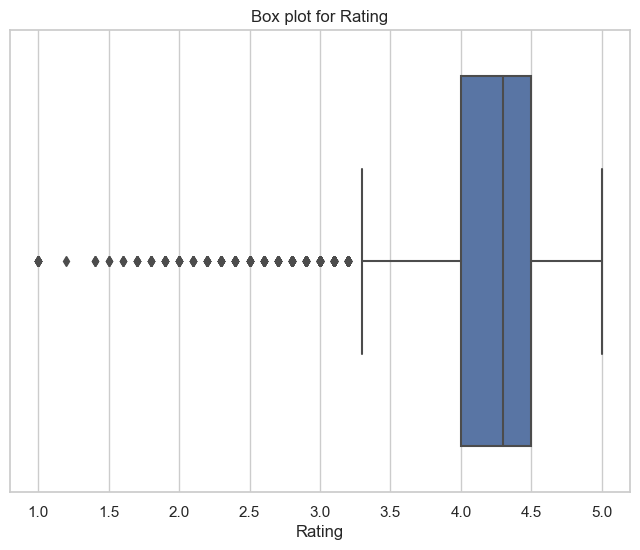

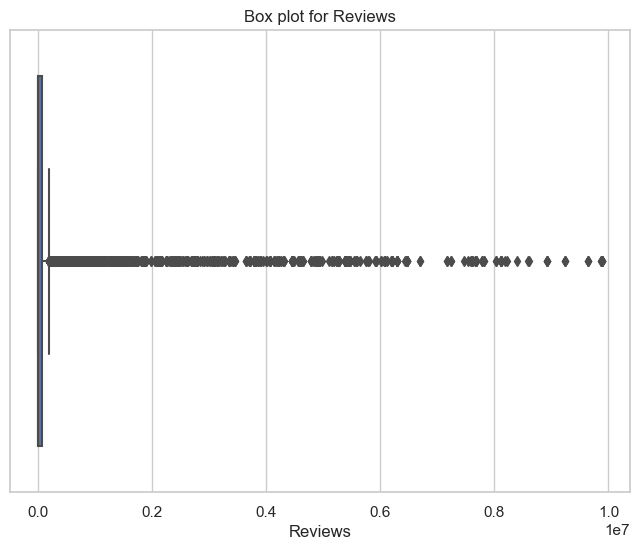

In [151]:
# Create box plots for numerical columns with potential outliers
numerical_columns = ['Rating', 'Reviews']  # Include other numerical columns as needed

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=dG)
    plt.title(f'Box plot for {column}')
    plt.show()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\3494964291.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DG = dG[(dG['Rating'] <= 5) & (dg['Reviews'] <= 10000000)]


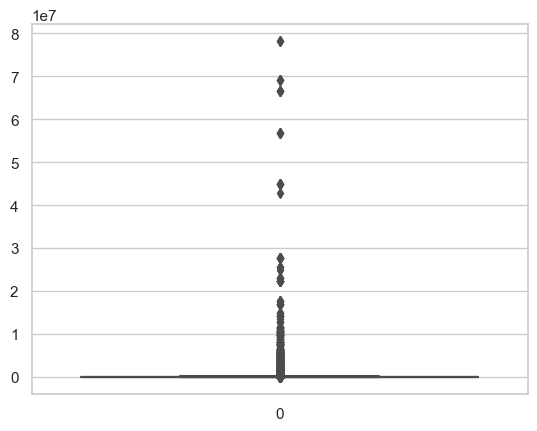

In [152]:
# Visualize outliers using box plots
sns.boxplot(dg['Rating'])
sns.boxplot(dg['Reviews'])

# Remove outliers (e.g., ratings > 5 or reviews outside a reasonable range)
DG = dG[(dG['Rating'] <= 5) & (dg['Reviews'] <= 10000000)]


In [153]:
DG['Genres'][0:10]

0     9
1    11
2     9
3     9
4    10
5     9
6     9
7     9
8     9
9    10
Name: Genres, dtype: int32

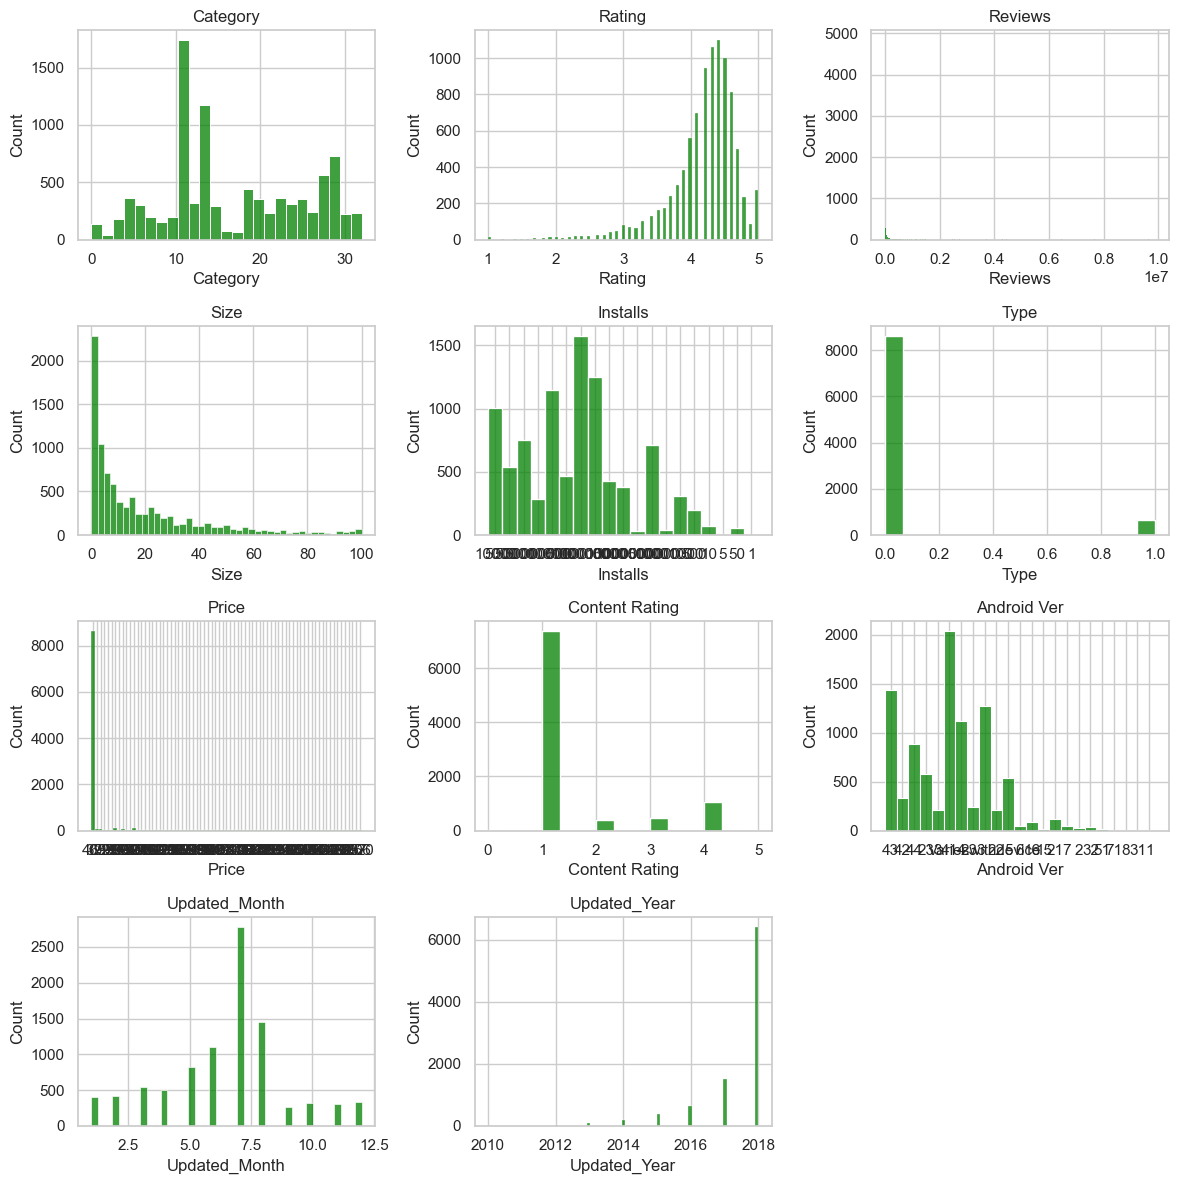

In [200]:
visual_data = DG.drop(['App' ,'Current Ver'  , 'Genres'] , axis = 1)
num_cols = len(visual_data.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()

for i, column in enumerate(visual_data.columns):
    ax = axes[i]
    sns.histplot(visual_data[column], ax=ax, color = "green")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [155]:
DG['Type'].unique()

array([0, 1])

#### Apps which are freely available have more isnstalls than the paid apps.

Text(0.5, 1.0, 'Count of app in each category')

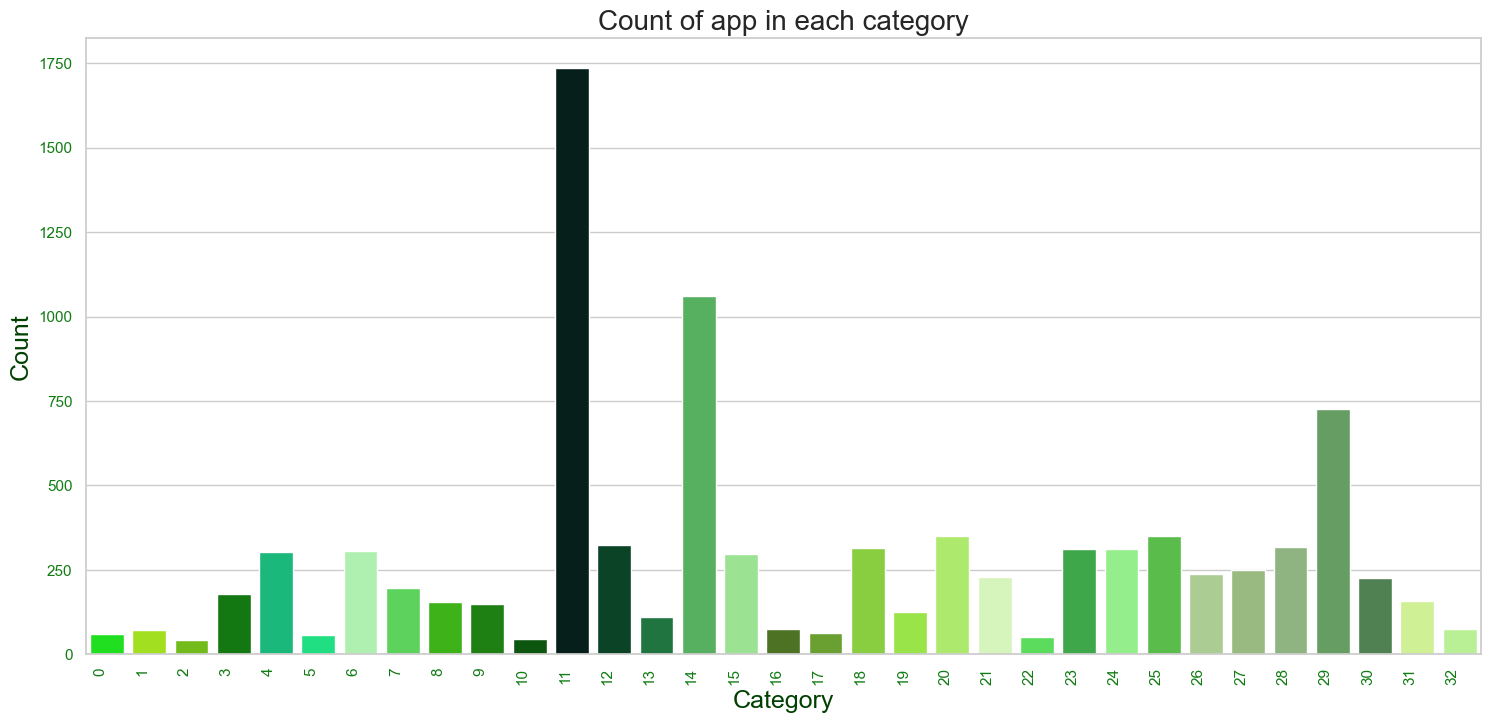

In [158]:
plt.figure(figsize=(18, 8))
color_t = "#004000"
plot_color = "#009900"
custom_palette = ["#00ff00", "#adff00", "#74d600", "#028900", "#00d27f","#00ff83", "#a4fba6", "#4ae54a", "#30cb00", "#0f9200",
                 "#006203", "#02231c", "#004d25", "#11823b", "#48bf53","#91f086", "#4d7f17", "#6bb120", "#8ae429", "#9afe2e",
                 "#aefe57", "#d4ffb2", "#45f248", "#2db83d", "#85ff7a","#4cd038", "#aad688", "#98c377", "#8bbd78", "#5ea758",
                 "#47894b", "#d5ff87", "#b6ff87", "#82ff59"]
g = sns.countplot(x="Category",data=DG, palette=custom_palette)
g.set_xlabel("Category", color=color_t, fontsize=18)
g.set_ylabel("Count" , color=color_t, fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.title('Count of app in each category',size = 20)

##### Family apps are rated high comapred to other age categories.

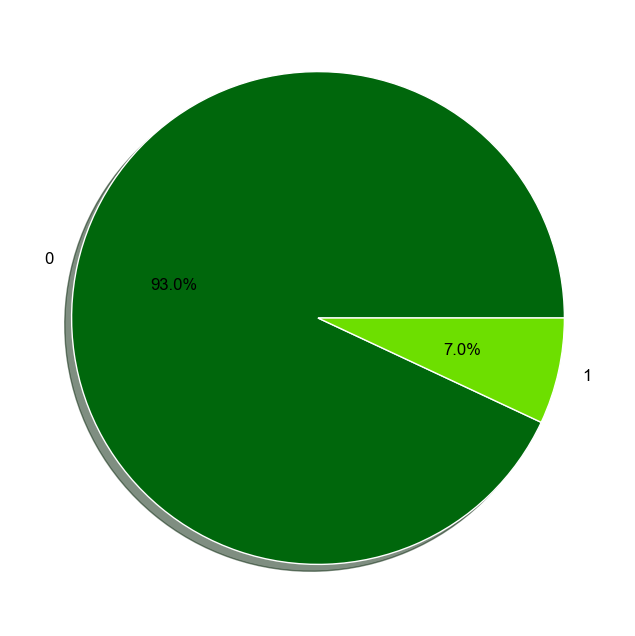

In [159]:
plt.figure(figsize=(18, 8))
text_color = "#117c13"
value_counts = DG['Type'].value_counts()
text_props = {'fontsize': 12, 'color': 'black'}
colors = ["#00670c","#6ddf00", "#a3ff00"]
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%' , textprops=text_props,shadow=True, colors=colors)
plt.show()

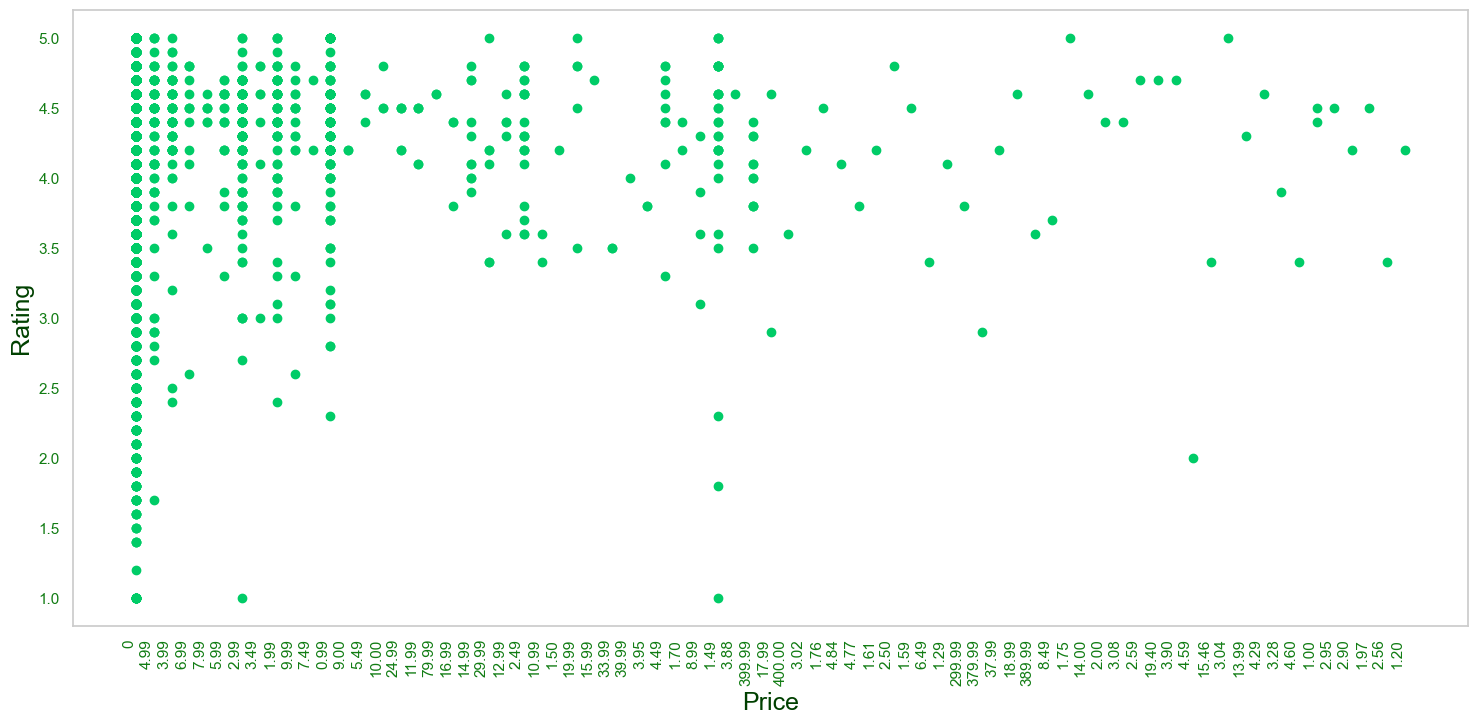

In [160]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(DG['Price'] , DG['Rating'] , color = '#00cc67')
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Price', color=color_t, fontsize=18)
plt.ylabel('Rating' , color=color_t, fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

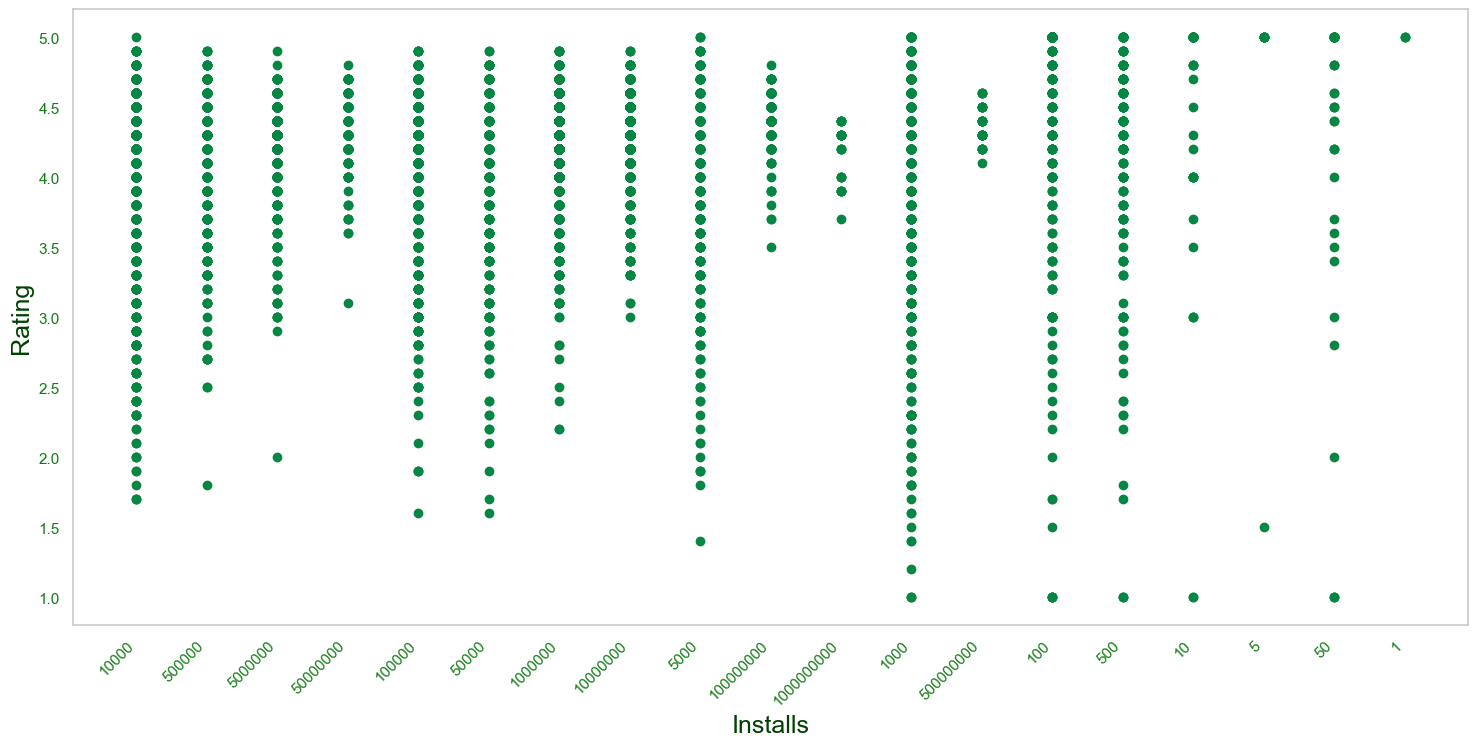

In [161]:
plt.figure(figsize=(18, 8))
color = "#4eff00"
color_t = "#004000"
text_color = "#117c13"
plt.scatter(DG['Installs'] , DG['Rating'] , color = '#058743')
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Installs', color=color_t, fontsize=18)
plt.ylabel('Rating' , color=color_t, fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

#### Installs are not dependent on the ratings of apps.

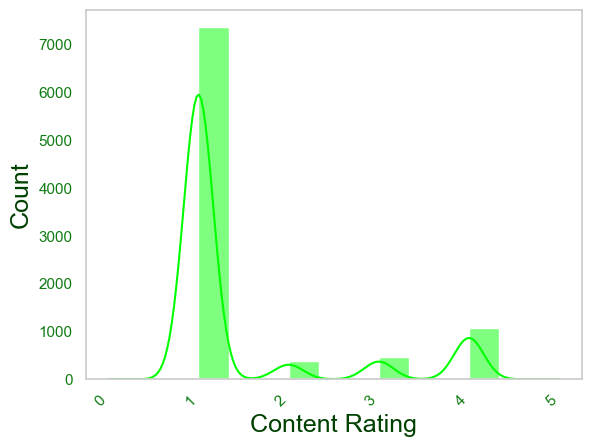

In [162]:
color = "#00ff00"
color_t = "#004000"
text_color = "#117c13"
sns.histplot(data=DG, x='Content Rating', kde=True , color=color)
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('Content Rating', color=color_t, fontsize=18)
plt.ylabel('Count' , color=color_t, fontsize=18)
plt.grid()
plt.show()

In [163]:
DG['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [164]:
additinal_item_android = ['and up' , 'W' , '- 7.1.1','- 8.0','.' , '- 60','0',' ' ]
target_col_android = ['Android Ver' ]
for item in additinal_item_android:
    for col in target_col_android:
        DG[col] = DG[col].str.replace(item,'')

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\851905814.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  DG[col] = DG[col].str.replace(item,'')
C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\851905814.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DG[col] = DG[col].str.replace(item,'')


In [165]:
DG['Android Ver'].unique()

array(['43', '42', '44', '23', '3', '41', '4', '233', 'Varieswithdevice',
       '22', '5', '6', '16', '15', '21', '7', '2', '32', '51', '71', '8',
       '31', '1'], dtype=object)

In [166]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical features
label_encoder = LabelEncoder()
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
for feature in categorical_features:
    DG[feature] = label_encoder.fit_transform(DG[feature])

In [167]:
DG[0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000,0,0,1,9,1.0.0,43,1,2018
1,Coloring book moana,0,3.9,967,14.0,500000,0,0,1,11,2.0.0,43,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000,0,0,1,9,1.2.4,43,8,2018
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000,0,0,4,9,Varies with device,42,6,2018
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000,0,0,1,10,1.1,44,6,2018


## Google reviews data

In [168]:
dr.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [169]:
dr.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [170]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [171]:
# Impute with mean for numerical columns
dr['Sentiment_Polarity'].fillna(dr['Sentiment_Polarity'].mean(), inplace=True)


In [172]:
# Impute with mode for categorical columns
dr['Sentiment'].fillna(dr['Sentiment'].mode()[0], inplace=True)
#

In [173]:
dr.shape

(64295, 5)

In [174]:
dr.dropna(subset=['Sentiment_Subjectivity'],inplace=True)

In [175]:
dr.dropna(subset=['Translated_Review'],inplace=True)


In [176]:
dr.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [177]:
dr.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [178]:
dr.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


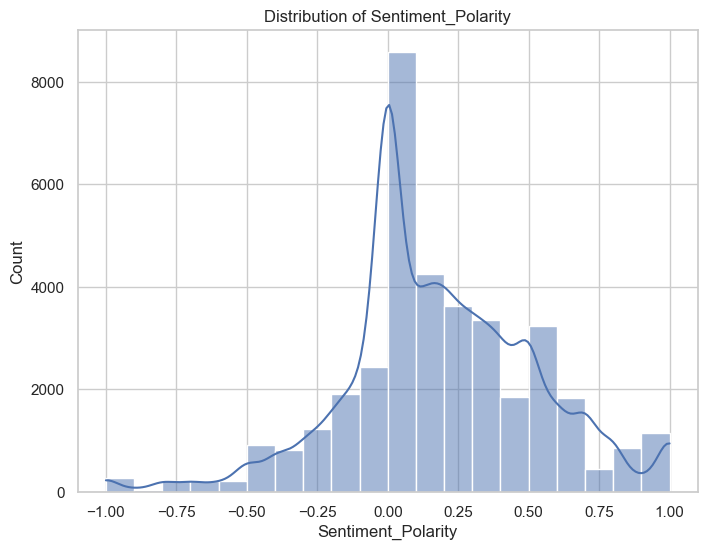

In [179]:
# Example: Histogram of Sentiment_Polarity
plt.figure(figsize=(8, 6))
sns.histplot(data=dr, x='Sentiment_Polarity', bins=20, kde=True)
plt.title("Distribution of Sentiment_Polarity")
plt.show()


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


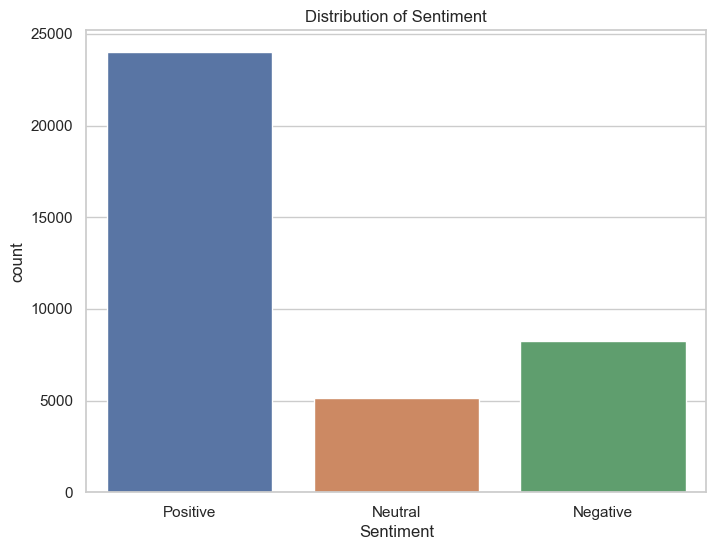

In [180]:
# Example: Frequency counts of Sentiment
sentiment_counts = dr['Sentiment'].value_counts()
print(sentiment_counts)

# Example: Bar plot of Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(data=dr, x='Sentiment')
plt.title("Distribution of Sentiment")
plt.show()


C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\2947090069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dr.corr()


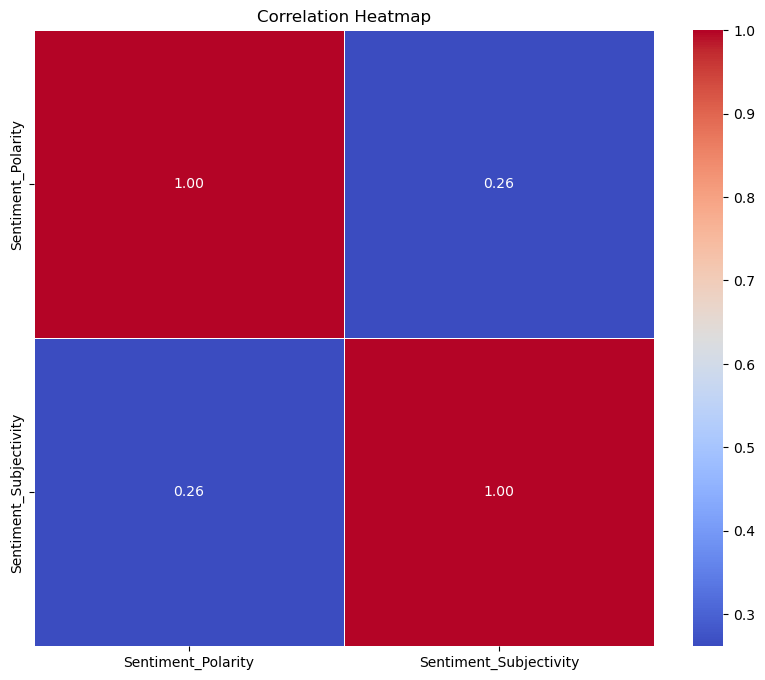

In [107]:
# Example: Correlation heatmap
correlation_matrix = dr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [181]:
# Aggregating review data by app
dR = dr.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Display the aggregated review data
dR.head()

,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315


## Mergings of data

In [182]:
merged_df = pd.merge(dr, DG, on='App', how='inner')
merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,15,4.0,2490,3.8,500000,0,0,2,60,1.9,233,2,2017
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,15,4.0,2490,3.8,500000,0,0,2,60,1.9,233,2,2017
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,15,4.0,2490,3.8,500000,0,0,2,60,1.9,233,2,2017
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,15,4.0,2490,3.8,500000,0,0,2,60,1.9,233,2,2017
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,15,4.0,2490,3.8,500000,0,0,2,60,1.9,233,2,2017


In [183]:
merged_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
67345,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,18,4.1,28301,0.0,1000000,0,0,1,65,12.1.0,41,7,2018
67346,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,18,4.1,28301,0.0,1000000,0,0,1,65,12.1.0,41,7,2018
67347,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,18,4.1,28301,0.0,1000000,0,0,1,65,12.1.0,41,7,2018
67348,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,18,4.1,28301,0.0,1000000,0,0,1,65,12.1.0,41,7,2018
67349,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,18,4.1,28301,0.0,1000000,0,0,1,65,12.1.0,41,7,2018


## Missing Values

In [184]:
merged_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Current Ver               0
Android Ver               0
Updated_Month             0
Updated_Year              0
dtype: int64

## Duplicates removal

In [185]:
# Remove duplicates
Merged_df = merged_df.drop_duplicates()

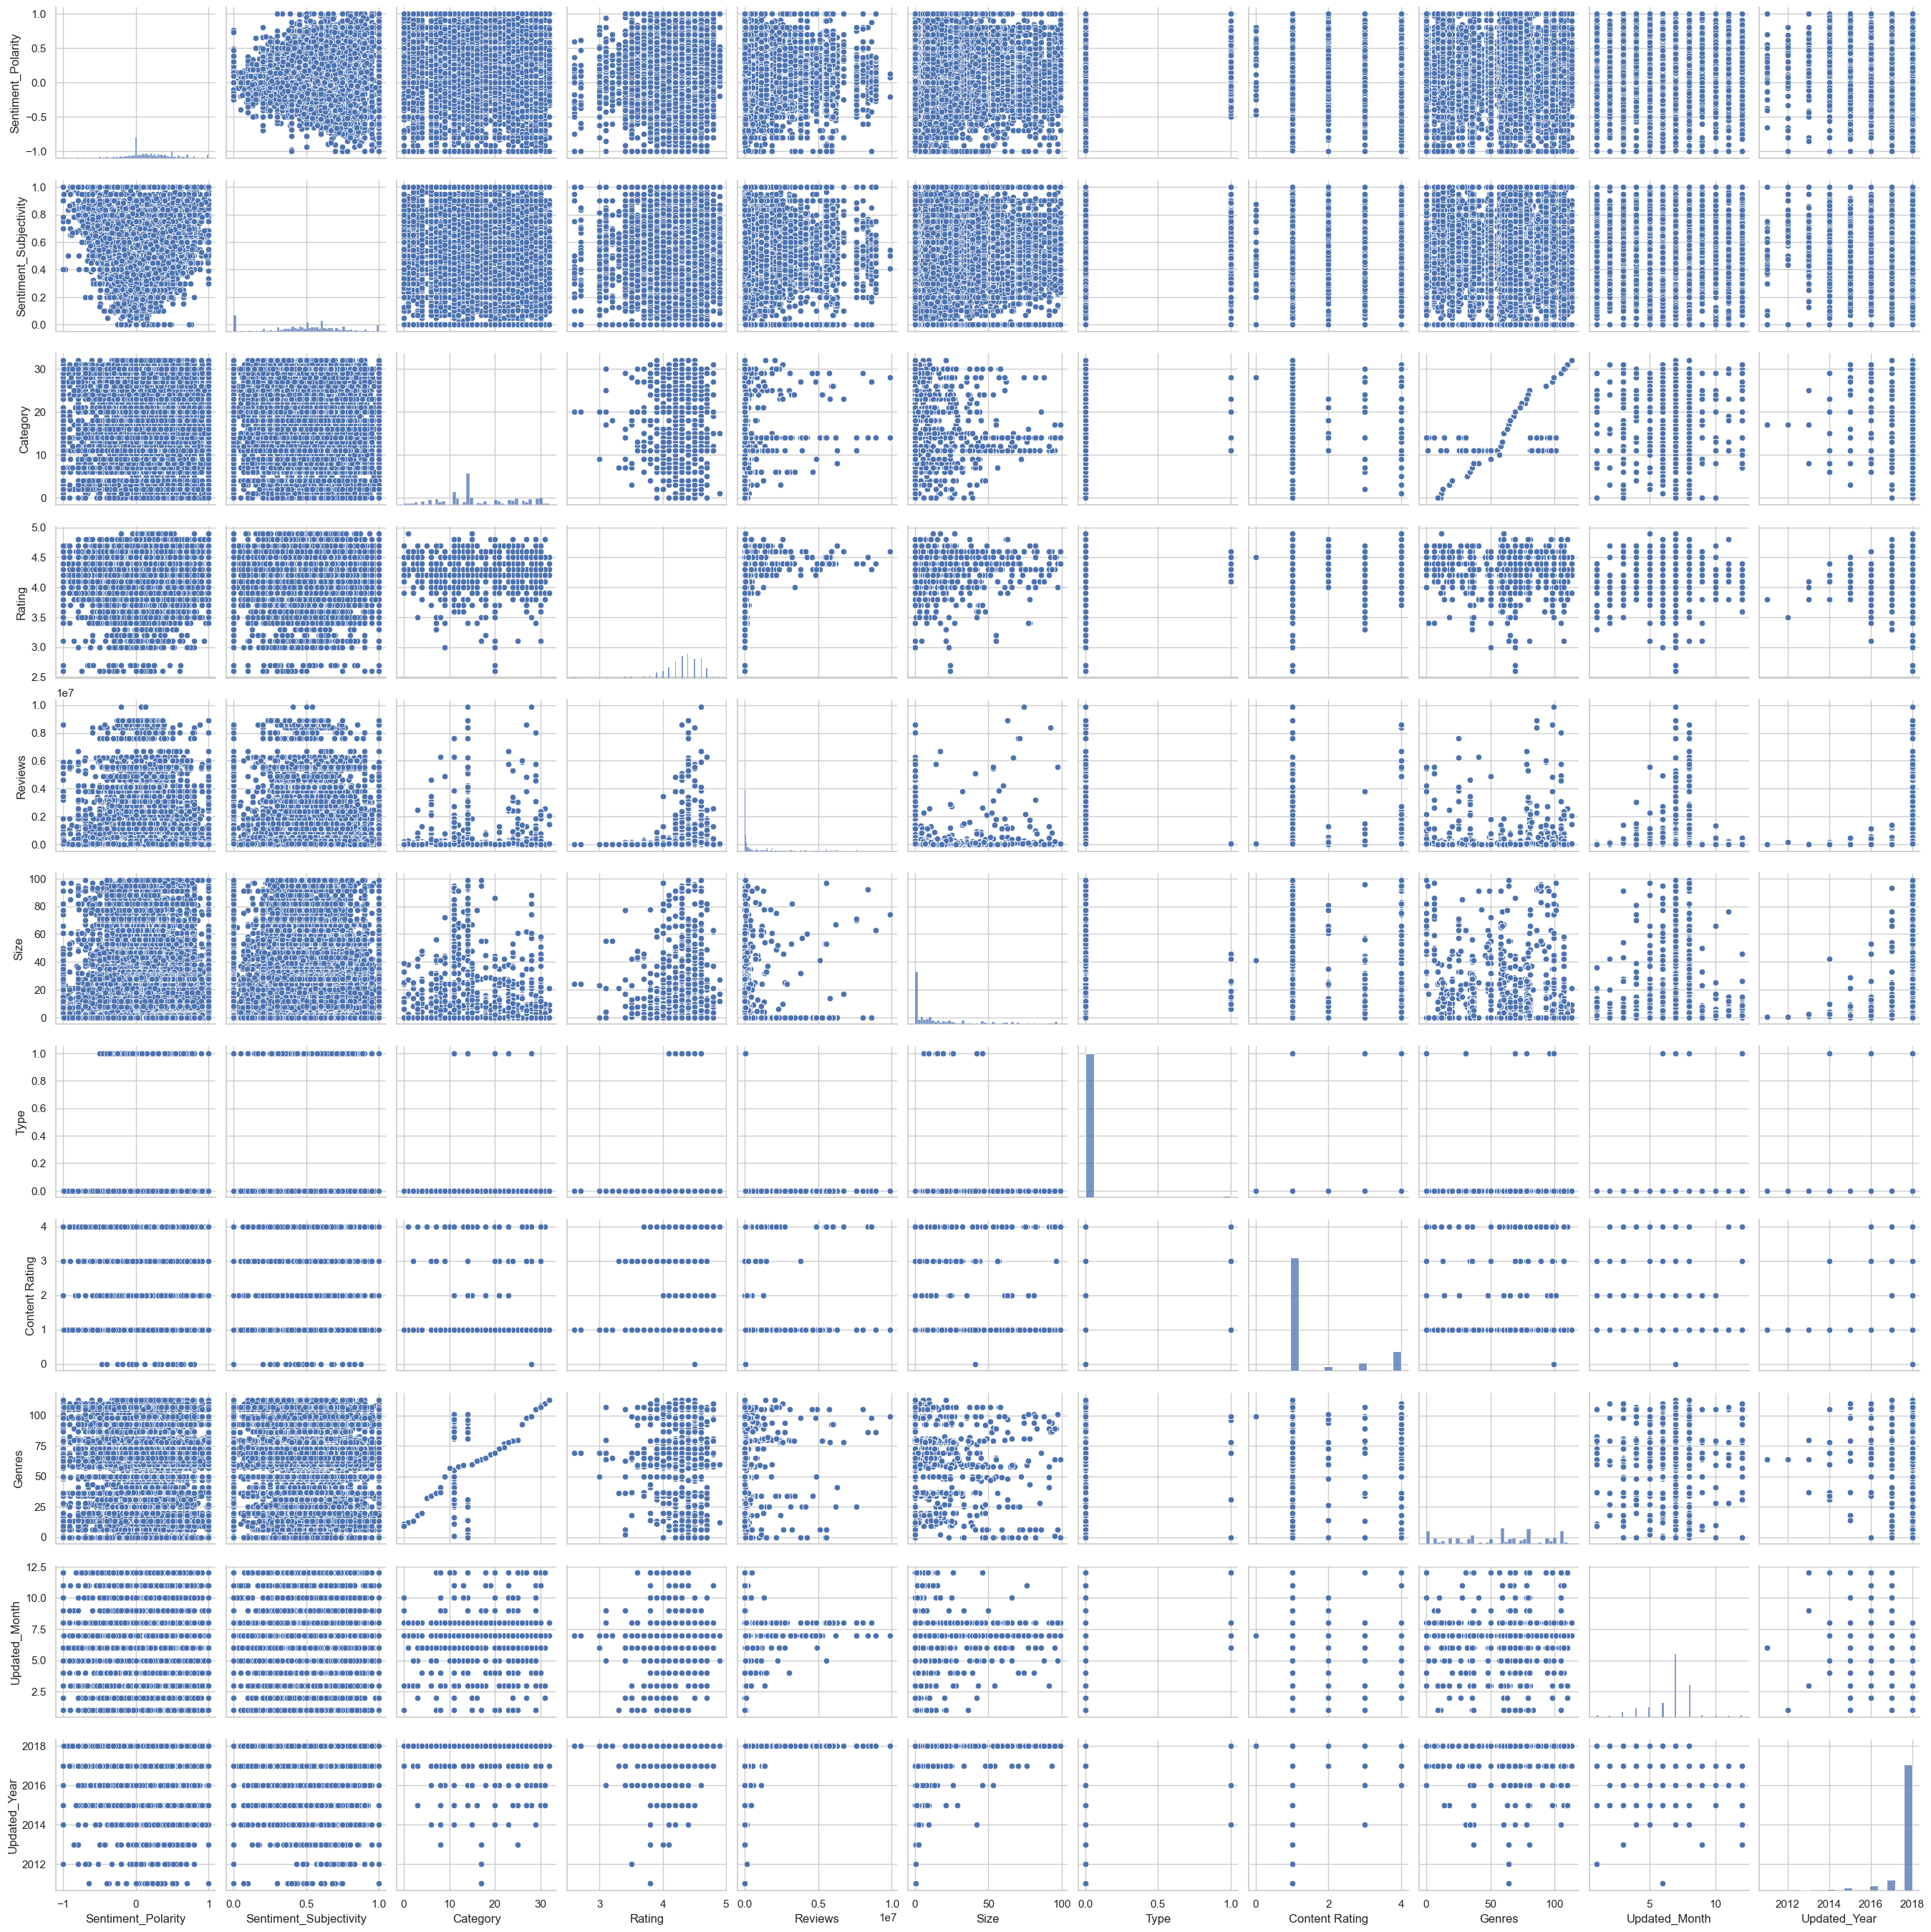

In [186]:
# Explore data using visualizations and descriptive statistics
sns.pairplot(Merged_df)
plt.show()


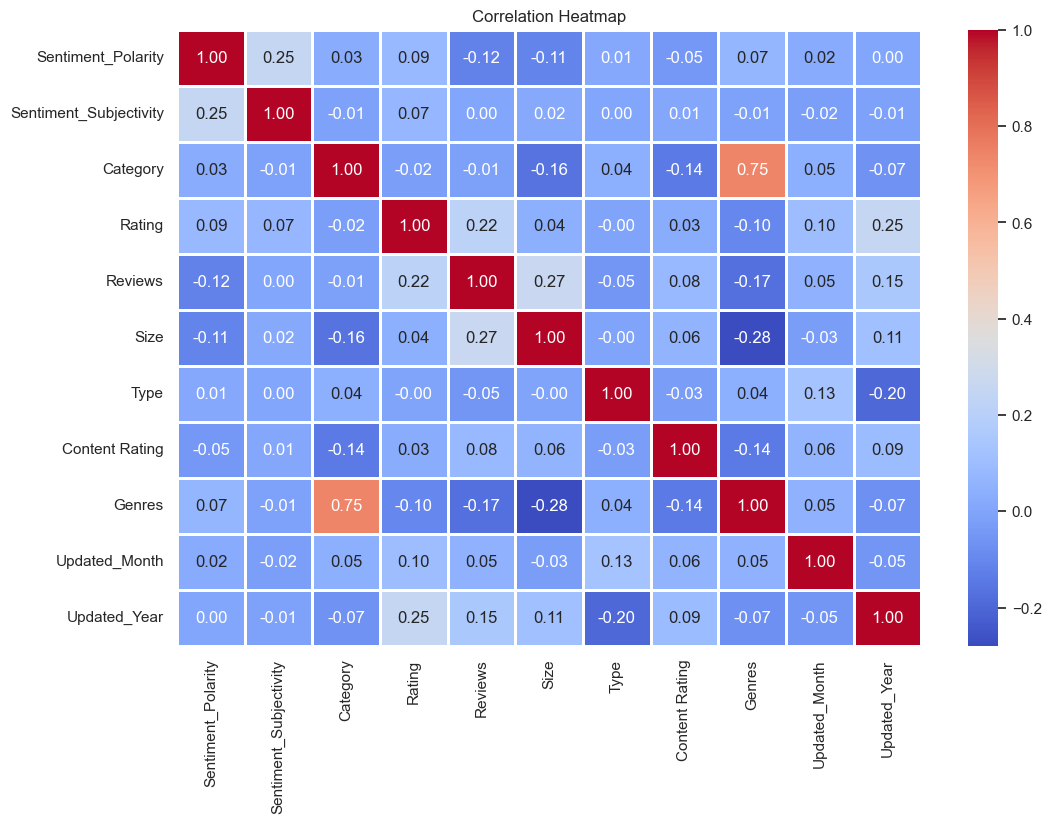

In [187]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = Merged_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

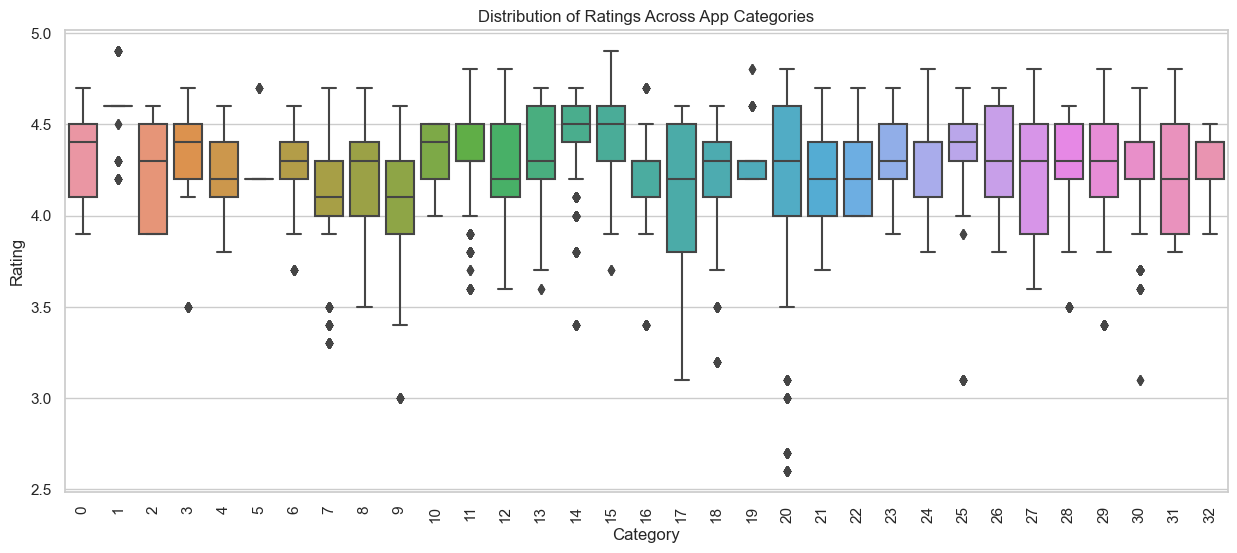

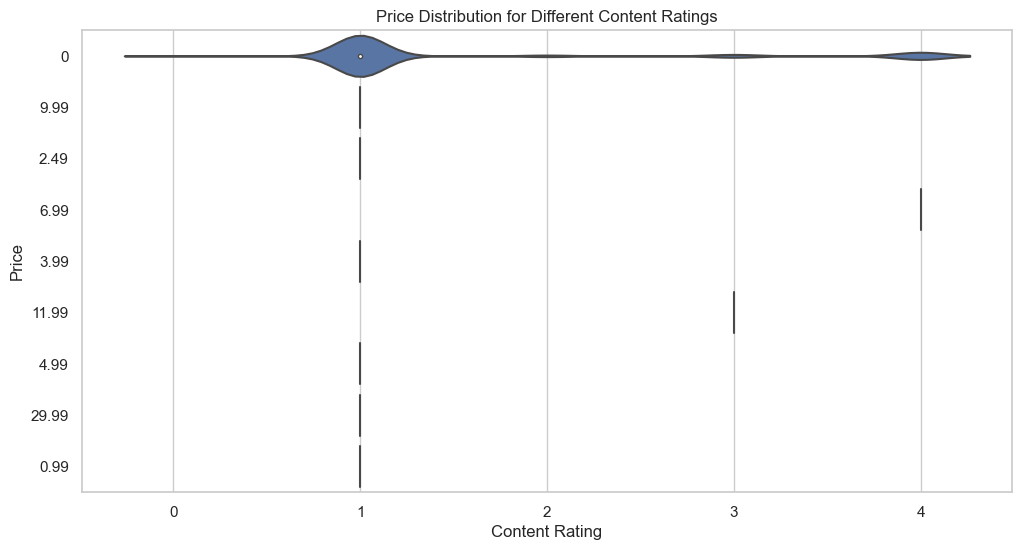

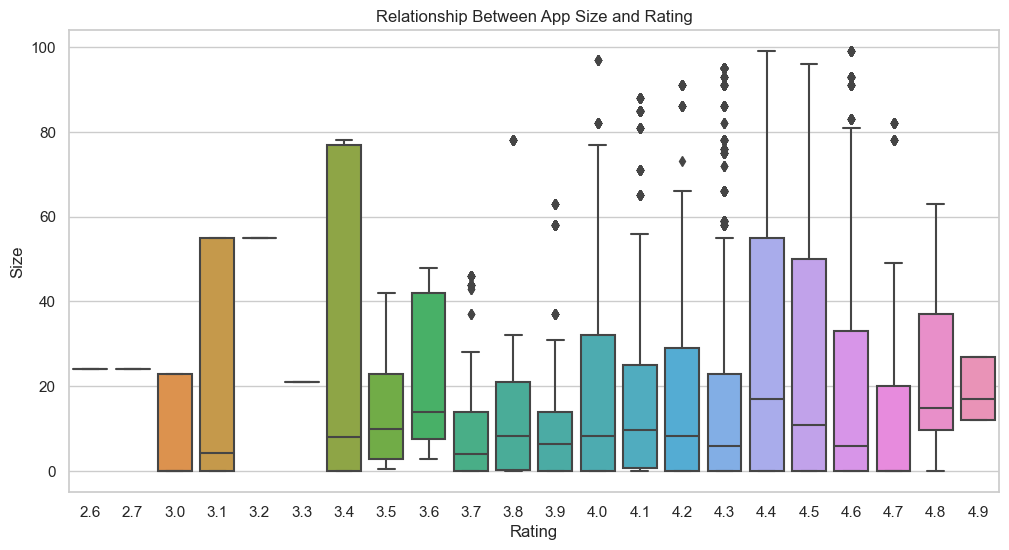

In [188]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Category', y='Rating', data=Merged_df)
plt.xticks(rotation=90)
plt.title("Distribution of Ratings Across App Categories")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Content Rating', y='Price', data=Merged_df)
plt.title("Price Distribution for Different Content Ratings")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', y='Size', data=Merged_df)
plt.title("Relationship Between App Size and Rating")
plt.show()

### Findings of the data
Most apps have median rating of 4.0.

Most of the apps are free.

Median Size remains same with change in Rating.

Larger size of app do not necessarily corelate with High Rating.

### Model Employment

In [195]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Features and Labels Segregation


X = Merged_df.drop(['App', 'Rating', 'Current Ver', 'Android Ver'], axis=1)
y = Merged_df['Rating']
threshold = 4
Merged_df['Target'] = (Merged_df['Rating'] >= threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Merged_df['Translated_Review'], Merged_df['Target'], test_size=0.2, random_state=42)



# Displaying the shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_18292\3354992777.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['Target'] = (Merged_df['Rating'] >= threshold).astype(int)


((30543,), (7636,), (30543,), (7636,))

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nltk.download('punkt')

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to C:\Users\Fast
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fast
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.68      0.26      0.38       774
           1       0.92      0.99      0.95      6862

    accuracy                           0.91      7636
   macro avg       0.80      0.63      0.67      7636
weighted avg       0.90      0.91      0.90      7636



C:\Users\Fast Computers\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Inferences:


#### The classification report provides a comprehensive summary of the performance of  logistic regression model for binary classification. 

#### Accuracy: The overall accuracy of the model is 0.913, which means that 91.3% of the predictions made by the model are correct.

#### Precision: Precision is a measure of the model's ability to correctly identify positive cases (1 in this case).

Precision for class 0 (negative class) is 0.68, which means that when the model predicts a sample as class 0, it is correct 68% of the time.
Precision for class 1 (positive class) is 0.92, which means that when the model predicts a sample as class 1, it is correct 92% of the time.
##### Recall (Sensitivity or True Positive Rate): Recall is a measure of the model's ability to correctly identify all positive cases.

Recall for class 0 is 0.26, which means that the model is only able to correctly identify 26% of the actual class 0 samples.
Recall for class 1 is 0.99, which means that the model is able to correctly identify 99% of the actual class 1 samples.
#### F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

F1-score for class 0 is 0.38, which considers both precision and recall for class 0.
F1-score for class 1 is 0.95, which considers both precision and recall for class 1.
#### Support: The number of samples in each class in the test dataset.

There are 774 samples of class 0 (negative class).
There are 6862 samples of class 1 (positive class).
#### Macro Avg: This is the average of precision, recall, and F1-score calculated for both classes. It gives equal weight to each class.

Weighted Avg: This is the weighted average of precision, recall, and F1-score calculated for both classes. It gives more weight to the class with a larger number of samples (in this case, class 1).

#####  Model has high accuracy and precision for class 1, which means it's good at correctly identifying positive cases. However, it has relatively low precision and recall for class 0, indicating that it struggles to correctly identify negative cases. Depending on specific application and goals, it needs to fine-tune the model to improve its performance on class 0 or adjust the model's threshold to balance precision and recall.